In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
import datetime as dt
from stockFunctions import graph
from stockFunctions import conversionSingle
from stockFunctions import conversionSingle
from stockFunctions import graph
from stockFunctions import rmsemape
import matplotlib.pyplot as plt


In [2]:
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,743.211792,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,747.393616,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,757.051514,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,755.060120,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,759.590393,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,726.434814,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,725.737915,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,709.409119,10689060


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]

stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [4]:
column="Close"

In [5]:
#Standarize the process, we can import MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [6]:
len(data1)

143

In [7]:
#Split the train set & test set
#In Machine learning, trainset & Test set divided as Random wise
#As Time series Analysis, for Trainset and Test set divided as Order wise Series
#Keep as note In interview basis, in time series anlaysis, How split the data, we can mention order wise series*Keep every time time reminder as as well
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [27]:
len(y_test)

29

In [9]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.15906733048148705
maPe-Testset: 0.8457722690454454
************
Lag=1,Trend=t
RMSE-Testset: 0.16295928192209552
maPe-Testset: 0.848683739822475
************
Lag=1,Trend=c
RMSE-Testset: 0.1607096568896775
maPe-Testset: 0.9755009016955194
************
Lag=1,Trend=ct
RMSE-Testset: 0.17848497333130417
maPe-Testset: 0.8616580186123874
************
Lag=2,Trend=n
RMSE-Testset: 0.16562577486117838
maPe-Testset: 0.8546394237167315
************
Lag=2,Trend=t
RMSE-Testset: 0.14793101477208526
maPe-Testset: 0.877749666458193
************
Lag=2,Trend=c
RMSE-Testset: 0.18425603406010907
maPe-Testset: 1.1139964077633402
************
Lag=2,Trend=ct
RMSE-Testset: 0.16461162541578636
maPe-Testset: 0.8761788145588738
************
Lag=3,Trend=n
RMSE-Testset: 0.16348500633516347
maPe-Testset: 0.837681172901036
************
Lag=3,Trend=t
RMSE-Testset: 0.148392141975915
maPe-Testset: 0.8376404454973414
************
Lag=3,Trend=c
RMSE-Testset: 0.16823655634770673
maPe-Testset: 1.

C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: Futu

In [ ]:
#In Time Series Analaysis (i.e- Decision Making) maPeTest set accuracy values is low, that we can consider as a good model"

In [10]:
#Her
i=2
td='t'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=2,Trend=t
RMSE-Testset: 0.14793101477208526
maPe-Testset: 0.877749666458193
************


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


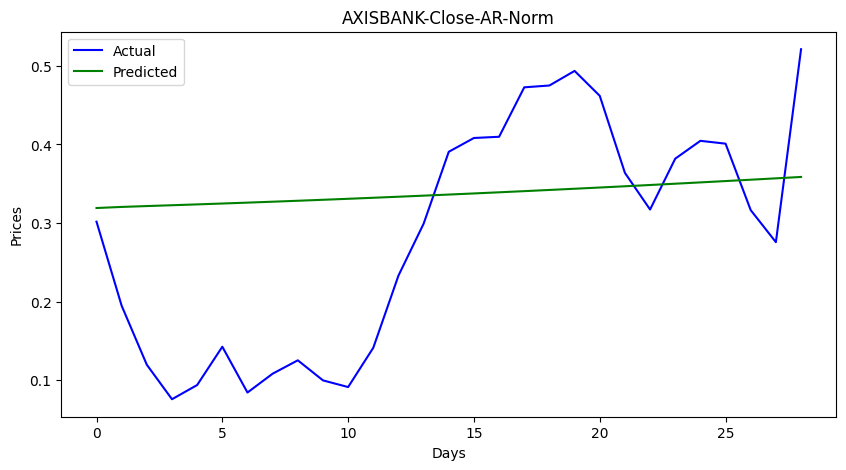

In [11]:
graph(y_test,y_pred,"Actual","Predicted","AXISBANK-Close-AR-Norm","Days","Prices")

In [12]:
len(data1)

143

In [13]:
y_test

array([[0.30180438],
       [0.19484561],
       [0.11984536],
       [0.07603093],
       [0.09407216],
       [0.14278357],
       [0.08453621],
       [0.10850541],
       [0.12551565],
       [0.10000013],
       [0.09149485],
       [0.14149491],
       [0.23324742],
       [0.29922706],
       [0.3907219 ],
       [0.40824749],
       [0.40979381],
       [0.47268048],
       [0.47500013],
       [0.4935567 ],
       [0.46185586],
       [0.36391771],
       [0.31726829],
       [0.38195895],
       [0.40463918],
       [0.40103118],
       [0.31649497],
       [0.2757732 ],
       [0.52113421]])

In [14]:
aTestNormTable=conversionSingle(y_test,[column])
aTestNormTable

,Close
0,0.301804
1,0.194846
2,0.119845
3,0.076031
4,0.094072
5,0.142784
6,0.084536
7,0.108505
8,0.125516
9,0.1


In [15]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [16]:
actual_stock_price_test_ori

array([[709.65002441],
       [688.90002441],
       [674.34997559],
       [665.84997559],
       [669.34997559],
       [678.79998779],
       [667.5       ],
       [672.15002441],
       [675.45001221],
       [670.5       ],
       [668.84997559],
       [678.54998779],
       [696.34997559],
       [709.15002441],
       [726.90002441],
       [730.29998779],
       [730.59997559],
       [742.79998779],
       [743.25      ],
       [746.84997559],
       [740.70001221],
       [721.70001221],
       [712.65002441],
       [725.20001221],
       [729.59997559],
       [728.90002441],
       [712.5       ],
       [704.59997559],
       [752.20001221]])

In [17]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.5
7,672.150024
8,675.450012
9,670.5


In [18]:
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [19]:
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

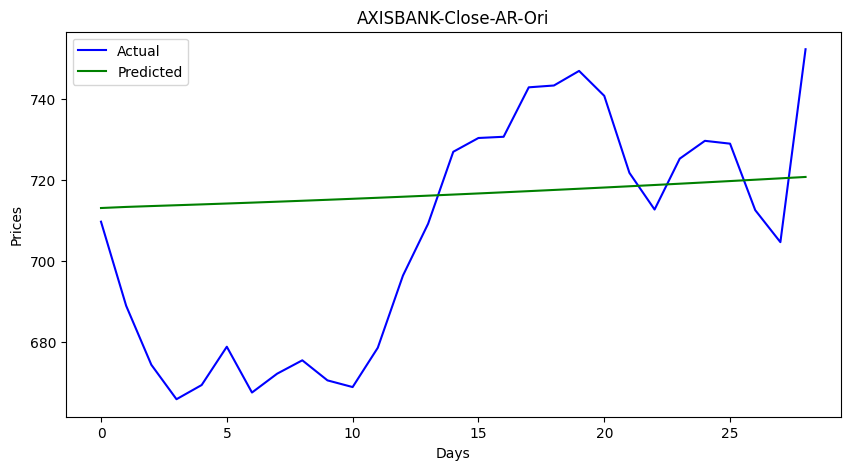

In [20]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","AXISBANK-Close-AR-Ori","Days","Prices")

In [21]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 28.69861686578453
maPe-Testset: 0.0352476556918202


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.36049106, 0.36230551, 0.36414305, 0.36600331])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [24]:
forecast_stock_price_test_oriF

,Closefore
0,721.035241
1,721.387245
2,721.743727
3,722.104618


In [25]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

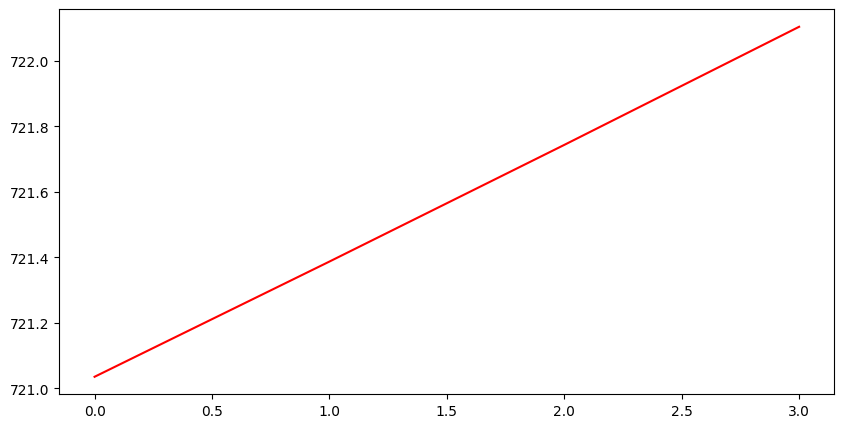

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")